# Group analysis of EEG data

author: Carina Forster

contact: forster@cbs.mpg.de

last updated 27.06.2024

Aim: how can we do statistics on group level EEG data?

In [2]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob

In [3]:
mne.set_log_level('error')  # reduce extraneous MNE output

#### We are using data provided by [the neural data science in Python book](https://neuraldatascience.io/7-eeg/erp_group_viz.html)

In [4]:
# where did you store the group data?
data_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool", "group_data")

In [5]:
# use glob package to get all files in directory
all_files = list(data_dir.glob("*"))  # This will get all files and directories

# Print the list of files
for file in all_files:
    print(file)

C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p01-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p02-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p03-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p04-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p05-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p06-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p07-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p08-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p09-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p10-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p11-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p12-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p13-ave.fif
C:\Users\Car

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

What does the -ave.fif file contain?

</div>

Experimental paradigm and hypothesis: 
People read sentences that ended in either a semantically congruent word 
(e.g., I take my coffee with milk and sugar), <br>
or an incongruent word (e.g., I take my coffee with milk and glass.). 

We predict an N400 effect, with more negative ERPs for incongruent words than congruent words: 

- significantly greater negativity between 400–600 ms, 
- largest over midline central-posterior channels (Cz, CPz, Pz) for incongruent words than congruent words

In [4]:
# define conditions
conditions = ['Control', 'Violation']

# loop over conditions and read in the data, save it in a dictionary called evokeds
evokeds = {}

for idx, c in enumerate(conditions):
    evokeds[c] = [mne.read_evokeds(d)[idx].set_montage('easycap-M1') for d in all_files]

evokeds

{'Control': [<Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=27), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=38), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=32), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=29), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=41), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=34), -0.1

### Let's check if there is a difference between conditions visually

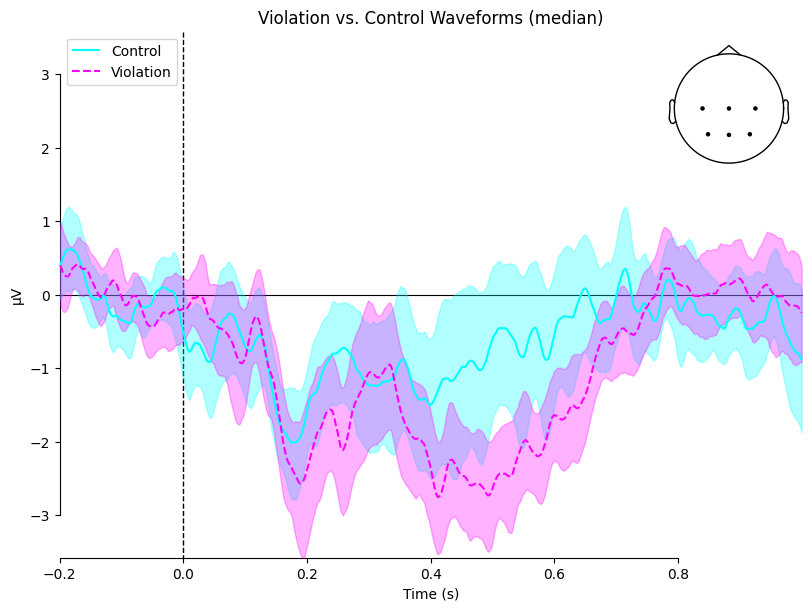

In [5]:
# Define ROI
roi = ['C3', 'Cz', 'C4', 
       'P3', 'Pz', 'P4']

# set custom line colors and styles
color_dict = {'Control':'cyan', 'Violation':'magenta'}
linestyle_dict = {'Control':'-', 'Violation':'--'}

mne.viz.plot_compare_evokeds(evokeds,
                             combine='median',
                             legend='upper left',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='Violation vs. Control Waveforms'
                            )
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Plot the difference between the two conditions.

</div>

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Is there a statistically significant difference? If yes, where and when? 

</div>

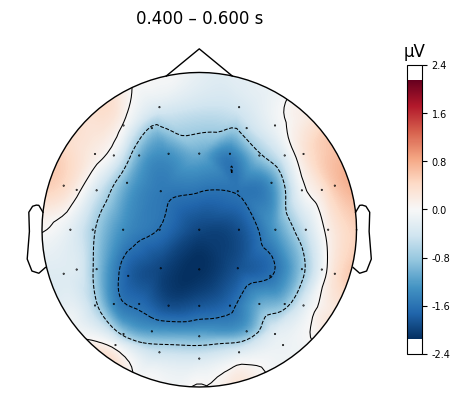

In [9]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            size=3
                           )
plt.show()

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

What can we conclude from the topomap?

What are the times and average parameters for in the function?

</div>

### What is a grand average?

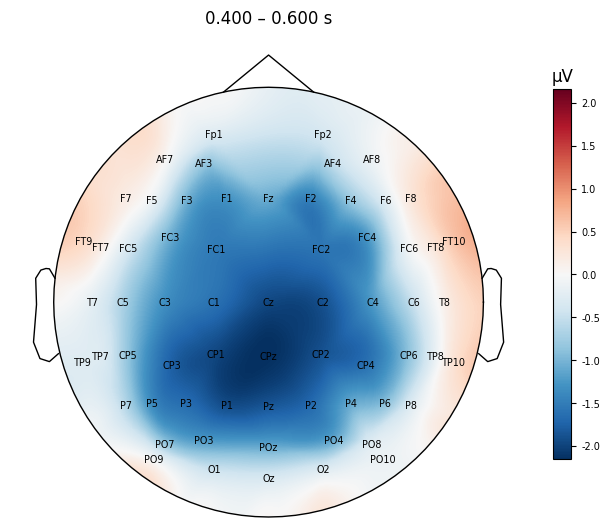

In [10]:
# made the plot a bit prettier
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            show_names=True, sensors=False,
                            contours=False,
                            size=4
                           );

# Everyone's favourite: Statistics 

Recommended reading on [how not to](https://doi.org/10.1111/psyp.12639) do statistics in EEG analysis

There are maaany ways to do statistics on EEG (high-dimensional) data. 

## 1. A priori t test (Univariate statistics)

In [12]:
# let's look at the difference waves again 
diff_waves

[<Evoked | 'Violation - Control' (average, N=18.246575342465754), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=12.98076923076923), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=18.986842105263158), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=16.716417910447763), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=14.5), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.24691358024691), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Con

In [13]:
# How do we get the data from this evoked object?

print(f'the data is of shape: {diff_waves[0].data.shape}')
print(f'the epoch start is: {diff_waves[0].tmin}')
print(f'the epoch end is: {diff_waves[0].tmax}')
print(f'the sampling rate is: {diff_waves[0].info["sfreq"]}')

the data is of shape: (64, 615)
the epoch start is: -0.19921875
the epoch end is: 1.0
the sampling rate is: 512.0


In [14]:
time_win = (.400, .600)
roi = ('Cz', 'CPz', 'Pz')

y = np.array([np.mean(e.get_data(picks=roi, 
                                 tmin=time_win[0], 
                                 tmax=time_win[1]
                                 ),
                      axis=1) 
              for e in diff_waves
              ]
             )

# check shape of result
y.shape

(26, 3)

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Explain the dimensions

</div>

In [15]:
from scipy import stats 

# average over channels
y_mean = np.mean(y, axis=1)
t, pval = stats.ttest_1samp(y_mean,0)

print('Difference t = ', str(round(t, 2)), 'p = ', str(round(pval, 4)))
# or run a test for each channel

for i, ch in enumerate(roi):
    t, pval = stats.ttest_1samp(y[:,i],0)
    print(f'Channel {ch}: Difference t =  {str(round(t, 2))} p = {str(round(pval, 4))}')

Difference t =  -3.33 p =  0.0027
Channel Cz: Difference t =  -3.23 p = 0.0035
Channel CPz: Difference t =  -3.56 p = 0.0015
Channel Pz: Difference t =  -2.93 p = 0.0071


<div class="alert alert-block alert-success">
<b>Exercise:</b> 

What was our hypothesis?

Is it okey to just run a t test for each channel?

</div>

### What if we don't have a ROI? Just do the same for 62 channel?

## 2. Mass univariate statistics

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Suppose we have no prior hypothesis about where and when the effect might happen:

We can do t tests for each channel and each timepoint:

How many possible combinations? 

</div>

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

What is the multiple comparisions problem? 

Solutions?

</div>

We will look at a cluster-based permutation approach:

recommended literature: [Nichols & Holmes, 2001](https://doi.org/10.1002/hbm.1058)

We are now looking  at a very nice graphical approach to cluster permutation testing, created by [Benedikt Ehinger](https://benediktehinger.de/blog/science/statistics-cluster-permutation-test/)

In [5]:
from mne.stats import spatio_temporal_cluster_1samp_test

In [6]:
# Let's prep the data for the cluster permutation test
y = np.swapaxes(np.array([e.get_data() 
                          for e in diff_waves
                          ]
                         ),
                1, 2
                )

# check shape of result
y.shape

NameError: name 'diff_waves' is not defined

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Explain what we are doing here

Do you know a different approach?

</div>

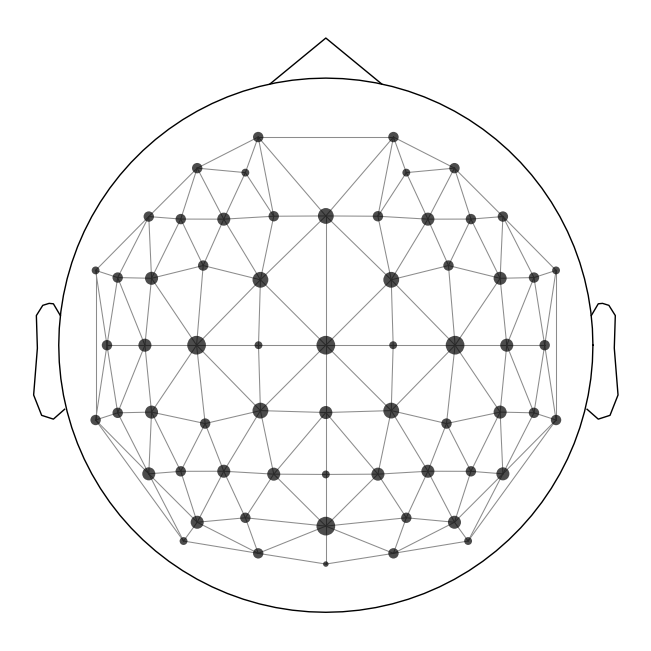

In [18]:
# Let's set up adjacency
adjacency, ch_names = mne.channels.find_ch_adjacency(diff_waves[0].info, ch_type='eeg')
mne.viz.plot_ch_adjacency(diff_waves[0].info, adjacency, ch_names=ch_names);

## Takes about 9 minutes on my machine, so be aware and prepare for getting a coffe

In [19]:
n_perm = 10000

t_obs, clusters, cluster_pv, H0 = spatio_temporal_cluster_1samp_test( 
    y, 
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, 
    verbose='Info'
    )

Using a threshold of 2.059539
stat_fun(H1): min=-5.136169173085791 max=5.136169173085791
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/9999 [00:00<?,       ?it/s]

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

How many clusters do we have?

How many of those are significant? 

</div>

In [57]:
# find significant points across all clusters
mask_idx = np.where(cluster_pv < 0.05)[0]
mask = [clusters[idx] for idx in mask_idx]

# stats output is time X chan, but ERP data is chan X time, so transpose
mask = mask[0].T

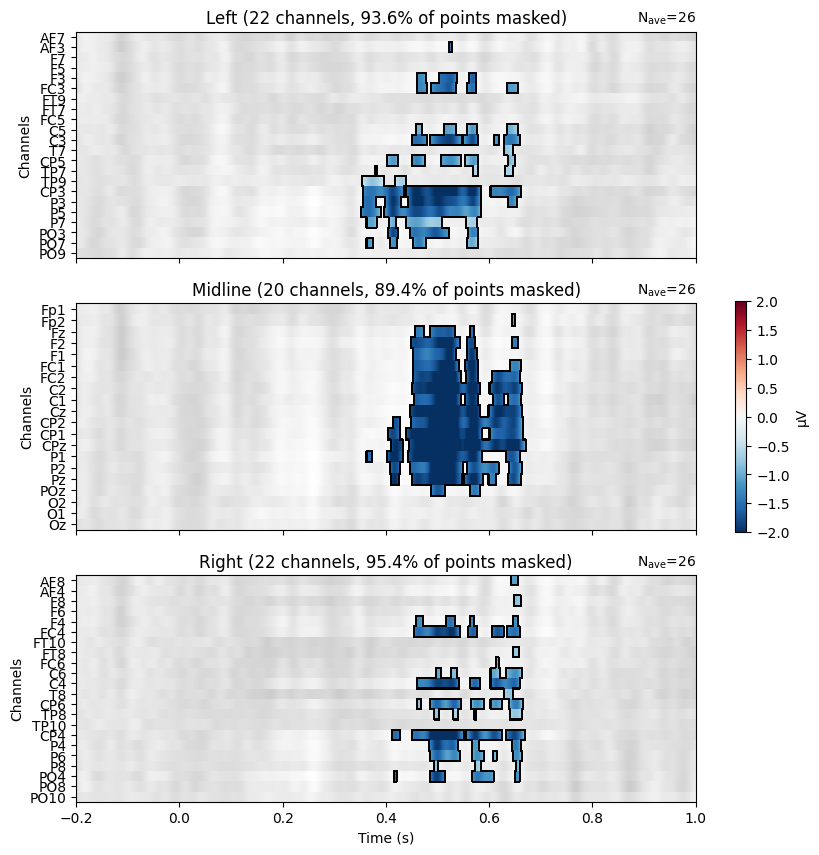

In [58]:
# Plot the cluster output

# Create ROIs by checking channel labels
selections = mne.channels.make_1020_channel_selections(diff_waves[0].info, midline="12z")
time_unit = dict(time_unit="s")

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()


<div class="alert alert-block alert-info">
<b>Bonus:</b> 

Different way to plot output of cluster perm test


</div>

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# run the cluster based permutation analysis without masking
cluster_stats = spatio_temporal_cluster_1samp_test(
    y,
    n_permutations=1000,
    n_jobs=None,
    buffer_size=None,
    adjacency=adjacency,
)

t_obs, clusters, p_values, _ = cluster_stats

# We subselect clusters that we consider significant at an arbitrarily
# picked alpha level: "p_accept".
# NOTE: remember the caveats with respect to "significant" clusters that
# we mentioned in the introduction of this tutorial!
p_accept = 0.01
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = {"Aud": "crimson", "Vis": "steelblue"}
linestyles = {"L": "-", "R": "--"}
event_id = {}

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # get topography for F stat
    f_map = t_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = evokeds['Control'].times[time_inds]

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout="constrained")

    # plot average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs.info, tmin=0)
    f_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        cmap="Reds",
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params=dict(markersize=10),
    )
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
    )

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes("right", size="300%", pad=1.2)
    title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(
        evokeds,
        title=title,
        picks=ch_inds,
        axes=ax_signals,
        colors=colors,
        linestyles=linestyles,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
    )

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx(
        (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
    )

plt.show()

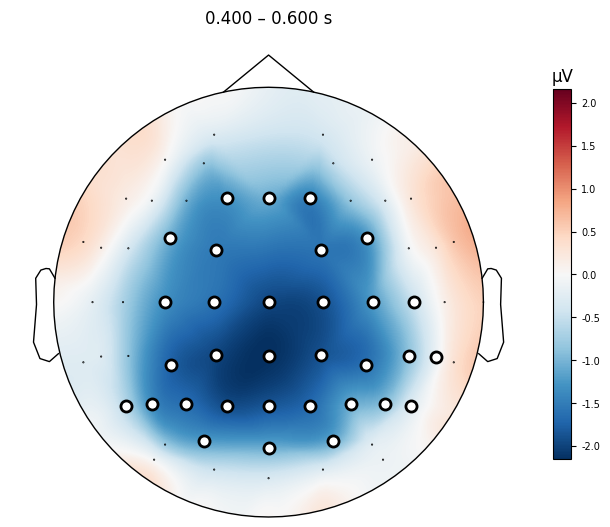

In [59]:
# Plot significant channels on topomap
mne.grand_average(diff_waves).plot_topomap(times=.500,
                                             average=0.200,
                                             mask=mask,
                                             contours=False,
                                             sensors=True,
                                             size=4
                                            );

Now let's use Threshold Free Cluster Enhancement (TFCE)

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Why would we use TFCE?

</div>

In [60]:
n_perm = 5000
threshold_tfce = dict(start=0, step=0.2)

t_tfce, clusters_tfce, cluster_pv_tfce, H0_tfce = spatio_temporal_cluster_1samp_test( 
    y, 
    threshold=threshold_tfce,
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, 
    verbose='Info'
    )

stat_fun(H1): min=-5.136169173085791 max=5.136169173085791
Running initial clustering …
Using 26 thresholds from 0.00 to 5.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 39360 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

In [ ]:
# stats output is time X chan, but ERP data is chan X time, so transpose
mask = cluster_pv_tfce.reshape(t_tfce.shape).T < .05

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()

In [ ]:
mne.grand_average(diff_waves).plot_topomap(times=.500,
                                             average=0.200,
                                             mask=mask,
                                             contours=False,
                                             sensors=True,
                                             size=4
                                            );

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Are the tests giving different results? 

If so, why? 

</div> 

### Important: How NOT to interpret cluster-based permutation tests: [fieldtrip](https://www.fieldtriptoolbox.org/faq/how_not_to_interpret_results_from_a_cluster-based_permutation_test/) and paper by [Sassenhagen](https://doi.org/10.1111/psyp.13335)